In [10]:
#Workflow 1
def function1(input1):
    # Process input1
    processed_input1 = 'My Name is ' + input1 +' from function1'
    return processed_input1

def function2(input2):
    # Process input2
    processed_input2 = ',and Deshara from function2'
    return input2 + processed_input2

In [11]:
from langgraph.graph import Graph


In [12]:
workflow1=Graph()

In [13]:
workflow1.add_node("function1", function1)

In [14]:
workflow1.add_node("function2",function2)

In [15]:
workflow1.add_edge("function1","function2")

In [16]:
workflow1.set_entry_point("function1")

In [17]:
workflow1.set_finish_point("function2")


In [18]:
app1=workflow1.compile()


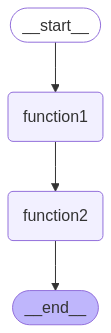

In [19]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)


In [21]:
app1.invoke("Rovidu")

'My Name is Rovidu from function1,and Deshara from function2'

In [24]:
from dotenv import load_dotenv
import os

load_dotenv()

GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")



In [25]:
#Creating a workflow with llm
#from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_google_genai import ChatGoogleGenerativeAI

#embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001" , google_api_key=GEMINI_API_KEY )

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash",
                            google_api_key=GEMINI_API_KEY , 
                            temperature=0.7)

In [27]:
llm.invoke('Who is Rovidu Deshara').content

'Rovidu Deshara is a Sri Lankan professional footballer who plays as a midfielder for Up Country Lions and the Sri Lanka national team.'

In [ ]:
def function1(input):
    response=llm.invoke(input).content
    return response


In [30]:
def function2(input):
    upper_case=input.upper()
    return upper_case

In [31]:
from langgraph.graph import Graph

workflow2=Graph()


In [32]:
workflow2.add_node("llm", function1)

In [38]:
workflow2.add_node("function2", function2)

ValueError: Node `function2` already present.

In [39]:
workflow2.add_edge("llm","function2")

ValueError: Already found path for node 'llm'.
For multiple edges, use StateGraph with an Annotated state key.

In [35]:
workflow2.set_entry_point("llm")
workflow2.set_finish_point("function2")

In [40]:
app2=workflow2.compile()

In [41]:
app2.invoke('Who are Sri lankans?')

'SRI LANKANS ARE THE PEOPLE WHO ORIGINATE FROM OR INHABIT THE ISLAND NATION OF SRI LANKA, LOCATED OFF THE SOUTHERN COAST OF INDIA.\n\nHERE\'S A BREAKDOWN OF WHO THEY ARE:\n\n*   **CITIZENSHIP:** SRI LANKANS ARE CITIZENS OF SRI LANKA.\n*   **ETHNICITY:** SRI LANKA IS A MULTI-ETHNIC SOCIETY. THE MAJOR ETHNIC GROUPS ARE:\n\n    *   **SINHALESE:** THE LARGEST ETHNIC GROUP, PRIMARILY SPEAKING SINHALA AND PREDOMINANTLY BUDDHIST.\n    *   **SRI LANKAN TAMILS:** CONCENTRATED MAINLY IN THE NORTH AND EAST OF THE COUNTRY, SPEAKING TAMIL AND PRIMARILY HINDU.\n    *   **INDIAN TAMILS:** BROUGHT TO SRI LANKA DURING THE COLONIAL ERA TO WORK ON PLANTATIONS, ALSO SPEAKING TAMIL AND PRIMARILY HINDU.\n    *   **SRI LANKAN MOORS (MUSLIMS):** A SIGNIFICANT MINORITY GROUP, SPEAKING TAMIL OR SINHALA AND PRACTICING ISLAM.\n    *   **BURGHERS:** DESCENDANTS OF EUROPEAN COLONIZERS (PRIMARILY PORTUGUESE, DUTCH, AND BRITISH) AND SRI LANKANS.\n    *   **MALAYS:** DESCENDANTS OF MIGRANTS FROM SOUTHEAST ASIA.\n    *

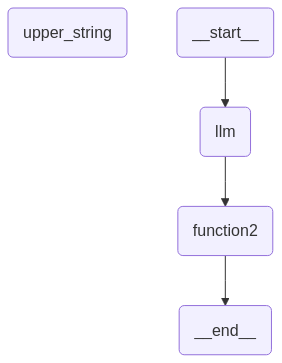

In [42]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)


In [8]:
#RAG Pipeline INtegration and integration it with langGraph

from langchain.document_loaders import DirectoryLoader
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

loader = DirectoryLoader('E:\ML\langGraph_Tutorials\data', glob="./llama3.txt", loader_cls=TextLoader)
docs = loader.load()

### Creating Chunks using RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=50,
    chunk_overlap=10,
    length_function=len
)
new_docs = text_splitter.split_documents(documents=docs)
doc_strings = [doc.page_content for doc in new_docs]



<>:7: SyntaxWarning: invalid escape sequence '\M'
<>:7: SyntaxWarning: invalid escape sequence '\M'
C:\Users\LapMaster\AppData\Local\Temp\ipykernel_15660\2192372351.py:7: SyntaxWarning: invalid escape sequence '\M'
  loader = DirectoryLoader('E:\ML\langGraph_Tutorials\data', glob="./llama3.txt", loader_cls=TextLoader)


In [9]:
docs

[Document(metadata={'source': 'E:\\ML\\langGraph_Tutorials\\data\\llama3.txt'}, page_content='Llama (Large Language Model Meta AI) is a family of autoregressive large language models released by Meta AI starting in February 2023.[2][3] The latest version is Llama 3 released in April 2024.[4]\n\nModel weights for the first version of Llama were released to the research community under a non-commercial license.[5][3] Subsequent versions of Llama were made accessible outside academia and released under licenses that permitted some commercial use.[6][7] Llama models are trained at different parameter sizes, typically ranging between 7B and 70B.[4] Originally, Llama was only available as a foundation model.[8] Starting with Llama 2, Meta AI started releasing instruction fine-tuned versions alongside foundation models.[7]\n\nLlama models have been compared favorably against other large language models. Meta AI reported the original 13B parameter model\'s performance on most NLP benchmarks ex

In [13]:
import os 
from dotenv import load_dotenv

load_dotenv()

GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")

In [14]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_google_genai import ChatGoogleGenerativeAI

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001" , google_api_key=GEMINI_API_KEY )

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash",
                            google_api_key=GEMINI_API_KEY , 
                            temperature=0.7)

In [15]:
from langchain.vectorstores import Chroma

db = Chroma.from_documents(new_docs, embeddings)
retriever = db.as_retriever(search_kwargs={"k": 4})

In [17]:
query = "what is meta llama3?"
docs = retriever.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)


C:\Users\LapMaster\AppData\Local\Temp\ipykernel_15660\708024704.py:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)


{'source': 'E:\\ML\\langGraph_Tutorials\\data\\llama3.txt'}
Alongside the release of Llama 3, Meta added
page_content='Alongside the release of Llama 3, Meta added' metadata={'source': 'E:\\ML\\langGraph_Tutorials\\data\\llama3.txt'}
page_content='model.[8] Starting with Llama 2, Meta AI started' metadata={'source': 'E:\\ML\\langGraph_Tutorials\\data\\llama3.txt'}
page_content='describes the 8B parameter version of Llama 3 as' metadata={'source': 'E:\\ML\\langGraph_Tutorials\\data\\llama3.txt'}
page_content='Llama (Large Language Model Meta AI) is a family' metadata={'source': 'E:\\ML\\langGraph_Tutorials\\data\\llama3.txt'}


In [18]:
#Integration with langGraph

def function_1(AgentState):
    
    message=AgentState["messages"]
    
    question=message[-1]
    
    complete_prompt="Your task is to provide only the brief answer based on the user query. \
        Don't include too much reasoning. Following is the user query: " + question
    
    response = llm.invoke(complete_prompt)
    
    AgentState['messages'].append(response.content) # appending LLM call response to the AgentState
    
    #print(AgentState)
    
    return AgentState

In [19]:
AgentState={}

In [20]:

AgentState["messages"]=[]

In [21]:
AgentState

{'messages': []}

In [22]:
AgentState["messages"].append("hi, how are you?")

In [23]:
AgentState

{'messages': ['hi, how are you?']}

In [25]:

from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough


def function_2(AgentState):
    messages = AgentState['messages']
    question = messages[0] ## Fetching the user question

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return result


In [26]:
# Define a Langchain graph
from langgraph.graph import Graph
workflow4 = Graph()
workflow4.add_node("LLM", function_1)
workflow4.add_node("RAGtool", function_2)
workflow4.add_edge('LLM', 'RAGtool')
workflow4.set_entry_point("LLM")
workflow4.set_finish_point("RAGtool")
app4 = workflow4.compile()



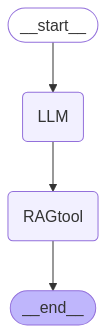

In [27]:
from IPython.display import Image, display

try:
    display(Image(app4.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)


In [28]:
inputs = {"messages": ["Tell me about llama3 model"]}

In [29]:
inputs

{'messages': ['Tell me about llama3 model']}

In [30]:

for output in app4.stream(inputs):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")


Output from node 'LLM':
---
{'messages': ['Tell me about llama3 model', "Meta's open-source large language model."]}

---

Output from node 'RAGtool':
---
The context mentions:

*   An 8B parameter version of Llama 3.
*   Model weights for the first version of Llama.
*   Llama models have been compared favorably against other models.
*   Llama 3 model is used in at least two services.

---



In [31]:
#Complex Implementation with 2 nodes and an agent

In [45]:
from langchain.document_loaders import DirectoryLoader , PyPDFLoader

loader2 = DirectoryLoader('E:\ML\langGraph_Tutorials\data', glob="./RAG_for_NLP.pdf", loader_cls=PyPDFLoader)
docs2 = loader2.load()
#E:\ML\langGraph_Tutorials\data\RAG_for_NLP.pdf

<>:3: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
C:\Users\LapMaster\AppData\Local\Temp\ipykernel_15660\969731845.py:3: SyntaxWarning: invalid escape sequence '\M'
  loader2 = DirectoryLoader('E:\ML\langGraph_Tutorials\data', glob="./RAG_for_NLP.pdf", loader_cls=PyPDFLoader)
Ignoring wrong pointing object 31 0 (offset 0)
Ignoring wrong pointing object 32 0 (offset 0)
Ignoring wrong pointing object 89 0 (offset 0)


In [46]:
docs2

[Document(metadata={'producer': 'macOS Version 10.15.7 (Build 19H15) Quartz PDFContext', 'creator': 'LaTeX with hyperref', 'creationdate': "D:20210107190157Z00'00'", 'moddate': "D:20210107190157Z00'00'", 'source': 'E:\\ML\\langGraph_Tutorials\\data\\RAG_for_NLP.pdf', 'total_pages': 16, 'page': 0, 'page_label': '1'}, page_content='Retrieval-Augmented Generation for\nKnowledge-Intensive NLP Tasks\nPatrick Lewis†‡ , Ethan Perez?,\nAleksandra Piktus† , Fabio Petroni† , Vladimir Karpukhin† , Naman Goyal† , Heinrich Küttler† ,\nMike Lewis† , Wen-tau Yih† , Tim Rocktäschel†‡ , Sebastian Riedel†‡ , Douwe Kiela†\n† Facebook AI Research;‡ University College London;?New York University;\nplewis@fb.com\nAbstract\nLarge pre-trained language models have been shown to store factual knowledge\nin their parameters, and achieve state-of-the-art results when ﬁne-tuned on down-\nstream NLP tasks. However, their ability to access and precisely manipulate\nknowledge is still limited, and hence on knowledge-

In [47]:

text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs2 = text_splitter.split_documents(documents=docs2)
doc_strings2 = [doc.page_content for doc in new_docs2]


In [49]:
db2 = Chroma.from_documents(new_docs2, embeddings)
retriever2 = db2.as_retriever(search_kwargs={"k": 3})


In [50]:
query = "Tell me about India's Industrial Growth?"
docs = retriever2.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)


{'source': 'E:\\ML\\langGraph_Tutorials\\data\\llama3.txt'}
it's size.[11]
page_content='it's size.[11]' metadata={'source': 'E:\\ML\\langGraph_Tutorials\\data\\llama3.txt'}
page_content='ThemiddleeaUinclXdeVWheW\mpaniccaYiW\andWheWhUeeoVVicleV.(y)QXeVWiRQ AQVZeUiQg:AQVZeU' metadata={'total_pages': 16, 'creationdate': "D:20210107190157Z00'00'", 'producer': 'macOS Version 10.15.7 (Build 19H15) Quartz PDFContext', 'page': 1, 'source': 'E:\\ML\\langGraph_Tutorials\\data\\RAG_for_NLP.pdf', 'moddate': "D:20210107190157Z00'00'", 'creator': 'LaTeX with hyperref', 'page_label': '2'}
page_content='ments with clues about the answer but do not contain the answer verbatim can still contribute' metadata={'moddate': "D:20210107190157Z00'00'", 'source': 'E:\\ML\\langGraph_Tutorials\\data\\RAG_for_NLP.pdf', 'producer': 'macOS Version 10.15.7 (Build 19H15) Quartz PDFContext', 'page_label': '5', 'page': 4, 'total_pages': 16, 'creator': 'LaTeX with hyperref', 'creationdate': "D:20210107190157Z0

In [51]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage
from langchain.prompts import PromptTemplate


In [52]:
class AgentState(TypedDict):
    # The 'messages' field should be a sequence of strings, and we annotate it with 'operator.add'
    # This implies we might want to "add" new messages to the sequence later
    messages: Annotated[Sequence[BaseMessage], operator.add]


In [53]:
from pydantic import BaseModel , Field
class TopicSelectionParser(BaseModel):
    Topic: str = Field(description='Selected Topic')
    Reasoning: str = Field(description='Reasoning behind topic selection')


In [54]:

from langchain.output_parsers import PydanticOutputParser
parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [55]:
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
```


In [56]:
def function_1(state):
    message=state["messages"]
    question=message[-1]
    print(question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [RAG, Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    
    prompt = PromptTemplate(template=template,
                                    input_variables=[question],
                                    partial_variables={
                                        "format_instructions" : parser.get_format_instructions()                                    }
                                    )
    chain =  prompt | llm | parser
    
    response = chain.invoke({"question":question,"format_instructions" : parser.get_format_instructions() })

    print(response)

    return {"messages": [response.Topic]}

In [57]:
template="""
    Your task is to classify the given user query into one of the following categories: [India, Not Related]. 
    Only respond with the category name and nothing else.

    User query: "Tell me about React Architecture"
    The output should be formatted as a JSON instance that conforms to the JSON schema below.

    As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
    the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

    Here is the output schema:
    ```
    {"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
        """


In [59]:
state={"messages": ["Tell me about React Architecture"]}


In [61]:
function_1(state)

Tell me about React Architecture
Topic='RAG' Reasoning='The user is asking for information about a specific topic (React Architecture), which can be answered using a retrieval-augmented generation approach.'


{'messages': ['RAG']}

In [62]:
def router(state):
    print('-> Router ->')
    
    messages = state["messages"]
    last_message = messages[-1]
    print(last_message)
    if 'RAG' in last_message:
        return 'RAG Call'
    else:
        return 'LLM Call'

In [63]:
def function_2(state):
    print('-> Calling RAG ->')
    messages = state['messages']
    question = messages[0] ## Fetching the user question
    print(question)

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)
    
    print(prompt)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return  {"messages": [result]}


     

In [64]:
def function_3(state):
    print('-> Calling LLM ->')

    messages = state['messages']
    question = messages[0] ## Fetching the user question

    # Normal LLM call
    complete_query = "Anwer the follow question with your knowledge of the real world. Following is the user question: " + question
    response = llm.invoke(complete_query)
    return {"messages": [response.content]}


In [65]:
AgentState

__main__.AgentState

In [74]:
from langgraph.graph import StateGraph,END

workflow5 = StateGraph(AgentState) ### StateGraph with AgentState


workflow5.add_node("agent", function_1)

workflow5.add_node("RAG", function_2)

workflow5.add_node("LLM", function_3)


workflow5.set_entry_point("agent")

workflow5.add_conditional_edges(
    "agent",
    
    
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

workflow5.add_edge("RAG",END)


workflow5.add_edge("LLM",END)


app5=workflow5.compile()


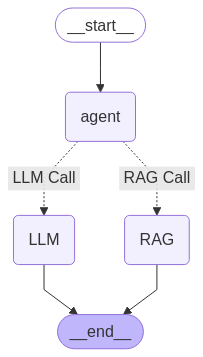

In [67]:
from IPython.display import Image, display

try:
    display(Image(app5.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)


In [75]:

inputs = {"messages": ["Tell me about best RAG tools"]}

In [76]:

output = app5.invoke(inputs)


Tell me about best RAG tools
Topic='RAG' Reasoning='The user is asking about RAG tools, indicating an interest in Retrieval-Augmented Generation.'
-> Router ->
RAG
-> Calling RAG ->
Tell me about best RAG tools
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]


In [70]:

inputs = {"messages": ["What is RAG"]}

In [71]:
output = app5.invoke(inputs)


What is RAG
Topic='RAG' Reasoning='The query explicitly asks about the definition of RAG.'
-> Router ->
RAG
-> Calling RAG ->
What is RAG
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]


In [72]:
inputs = {"messages": ["Who is GOD OF THUNDER"]}

In [73]:
output = app5.invoke(inputs)


Who is GOD OF THUNDER
Topic='RAG' Reasoning='The query is asking a question that requires retrieving information about a specific entity.'
-> Router ->
RAG
-> Calling RAG ->
Who is GOD OF THUNDER
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]


In [77]:
output

{'messages': ['Tell me about best RAG tools',
  'RAG',
  'Based on the provided documents, I cannot answer the question about the best RAG tools. The documents discuss RAG (Retrieval-Augmented Generation) in the context of knowledge-intensive tasks and achieving state-of-the-art results. However, they do not mention specific RAG tools.']}